In [ ]:
import numpy as np
import pandas as pd


# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [106]:
import pandas as pd
import numpy as np

# write your code for task 0 here
df = pd.read_csv('../data/adult.csv')
df.replace('?', np.nan, inplace=True)  
df.dropna(inplace=True)

# df.info()
df['salary'] = df['salary'].str.replace(r'[^\d.]', '', regex=True)
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
df.dropna(subset=['salary'], inplace=True)
# df.info()

df['consistent'] = np.isclose(df['salary'], df['salary K$'] * 1000)
inconsistent_rows = df[~df['consistent']]
print(inconsistent_rows.count())


1508100
Unnamed: 0        30162
age               30162
workclass         30162
education         30162
marital-status    30162
occupation        30162
relationship      30162
race              30162
sex               30162
hours-per-week    30162
native-country    30162
salary            30162
salary K$         30162
consistent        30162
dtype: int64


# Task 1
Print the count of men and women in the dataset.

In [35]:
# write your code for task 1 here
df.head()
sex = df['sex'].value_counts()
woman = sex['Female']
man = sex['Male']
print(f"woman {woman} and man {man}")


woman 9782 and man 20380


# Task 2
Find the average age of men in dataset

In [98]:
man_average_age = df[df['sex'].apply(lambda sex: sex == 'Male')]['age'].mean()
print(man_average_age)
df.info()


39.18400392541707
<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30162 non-null  int64 
 1   age             30162 non-null  int64 
 2   workclass       30162 non-null  object
 3   education       30162 non-null  object
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   hours-per-week  30162 non-null  int64 
 10  native-country  30162 non-null  object
 11  salary          30162 non-null  int64 
 12  salary K$       30162 non-null  int64 
 13  consistent      30162 non-null  bool  
 14  married         30162 non-null  object
dtypes: bool(1), int64(5), object(9)
memory usage: 3.5+ MB


# Task 3
Get the percentage of people from Poland (native-country)

In [57]:
from_poland = df[df['native-country'].apply(lambda country: country == 'Poland')].shape[0]
from_poland_percent = (from_poland * 100) / df.shape[0]
print(round(from_poland_percent, 2), "%")


0.19 %


,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$,consistent
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,50,39,False
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,50,35,False
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,50,27,False
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,50,43,False
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,50,25,False


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [65]:
over50k = df[df['salary'] > 50000]  # empty data frame
less50k = df[df['salary'] <= 50000] 
mean_less50k = less50k['age'].mean()
std_less50k = less50k['age'].std()
print(mean_less50k, std_less50k)


38.437901995888865 13.134664776855985


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [75]:
high_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
non_educated = df[df['education'].apply(lambda edu: edu not in high_education) & (df['salary'] > 50)].shape[0]
print(non_educated)


0


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [78]:
groupped = df.groupby('education')['age']
groupped.describe()


,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [85]:
df['married'] = df['marital-status'].apply(lambda x: 'Married' if x.startswith('Married') else 'Not Married')
aggregated_counts = df.groupby(['married', 'salary']).size()
print(aggregated_counts)


married      salary
Married      50        14456
Not Married  50        15706
dtype: int64


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [91]:
max_hours = df['hours-per-week'].max()
hard_workers = df[df['hours-per-week'].apply(lambda x : x == max_hours)].shape[0]
print(hard_workers)


78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

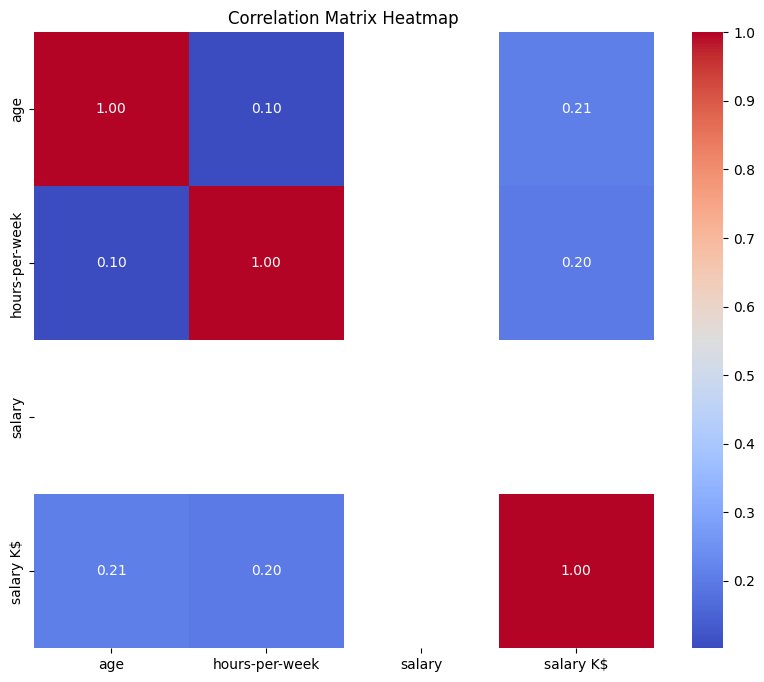

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df[['age', 'hours-per-week', 'salary', 'salary K$']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
